## University of Georgia, Masters of Marketing Research, Terry College of Business

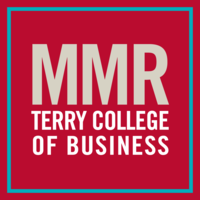

#### Applications of Marketing Research Techniques
#### Janie Davis, Amanda Patton, Sarah Montgomery, Zoe Zirlin

#### Importing packages and cleaned datafile

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [54]:
df = pd.read_excel('/Users/zoezirlin/Desktop/COMPILED CLEANED.xlsx')

______________

## Topic #1: Primary attention check and secondary attention check

#### Checking to see how many people marked "No- But I will participate anyways" to the question "It is very important that you read each question carefully and think about your answer before you give it. We rely on our respondents being thoughtful and taking this task seriously. Do you commit to doing this?"

In [55]:
pd.value_counts(df['Q17'])

Yes- I commit to reading each question carefully and thinking about my answer before giving it.     521
Yes - I commit to reading each question carefully and thinking about my answer before I give it.    484
No- But I will participate anyways.                                                                  11
No - But I will participate anyways.                                                                  1
Name: Q17, dtype: int64

#### 12 respondents marked that they will not pay attention to the survey. 
#### They are dropped below.

In [80]:
attention_check_failure_1_A = df[ (df['Q17'] == 'No- But I will participate anyways.')].index
attention_check_failure_1_B = df[ (df['Q17'] == 'No - But I will participate anyways.')].index

df.drop(attention_check_failure_1_A, inplace = True)
df.drop(attention_check_failure_1_B, inplace = True)

pd.value_counts(df['Q17']) #This ensures that the drop mechanism was successful!

Yes- I commit to reading each question carefully and thinking about my answer before giving it.     500
Yes - I commit to reading each question carefully and thinking about my answer before I give it.    479
0                                                                                                     1
Name: Q17, dtype: int64

#### Checking to see how many people incorrectly marked the secondary attention check

In [57]:
pd.value_counts(df['Q30'])

3.0    651
2.0      4
1.0      1
Name: Q30, dtype: int64

#### 5 respondents incorrectly marked the attention check. They were charged in the instructions for the question to mark "3".
#### They are dropped below.

In [58]:
attention_check_failure_2_A = df[ (df['Q30'] == 2)].index
attention_check_failure_2_B = df[ (df['Q30'] == 1)].index

df.drop(attention_check_failure_2_A, inplace = True)
df.drop(attention_check_failure_2_B, inplace = True)

pd.value_counts(df['Q30'])

3.0    651
Name: Q30, dtype: int64

In [59]:
df.fillna(0, inplace=True)

_______

## Topic #2: Number of people in household

#### Average amount of people in a household is 2.83, max is 12, minimum is 1, median is 3

In [60]:
df['Q2'].describe()

count    1001.000000
mean        2.838162
std         1.518480
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: Q2, dtype: float64

#### The number of people in households surveyed is right skewed, with the majority falling between 1 and 5 people per household.

(array([204., 287., 181., 199.,  79.,  47.,   2.,   0.,   1.,   1.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

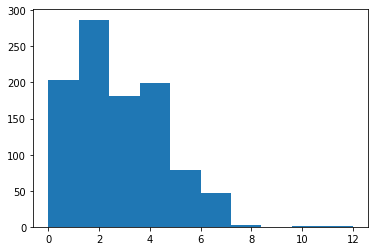

In [61]:
plt.hist(df['Q2'])

________

## Topic #3: How many cars are owned or leased by the household

#### Average amount of cars is 1.8, min is 0, max is 10.

In [62]:
df['Q4'].describe()

count    1001.000000
mean        1.538462
std         1.181003
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: Q4, dtype: float64

#### "Does anyone in your household own or lease a car?"

In [121]:
df['Q3'].value_counts()

Yes    833
No     147
Name: Q3, dtype: int64

__________

## Topic #4: How much money is spent on gasoline per month

#### There is a respondent that marked 50,000 USD as the amount that they spend on gasoline per month.

#### We are dropping observations in which more than 1,000 USD is supposedly spent on gasoline per month. (The average cost of gas per month is 250 USD.)

#### Median amount of money spent on gasoline per month is 60 USD.

In [63]:
df["Q5"].describe()

count     1001.000000
mean       193.892298
std       1713.643817
min          0.000000
25%         25.000000
50%         60.000000
75%        110.000000
max      50000.000000
Name: Q5, dtype: float64

In [70]:
gasoline_outlier = df[ (df['Q5'] > 1000)].index
df.drop(gasoline_outlier, inplace=True)

In [65]:
df["Q5"].describe()

count     992.000000
mean       95.853014
std       129.396062
min         0.000000
25%        20.000000
50%        60.000000
75%       100.000000
max      1000.000000
Name: Q5, dtype: float64

________

## Topic #5: How much time is spent in the car per week

#### Logically, one will not spend more than 70 hours per week in the car, unless they work in their car or live in their car. We are cutting observations with more than 70 hours per week spent in the car.

In [84]:
df["Q6"].describe()

count    980.000000
mean       6.286878
std        8.276970
min        0.000000
25%        1.000000
50%        4.000000
75%        8.000000
max       70.000000
Name: Q6, dtype: float64

In [71]:
car_time_outlier = df[ (df['Q6'] > 70)].index
df.drop(car_time_outlier, inplace=True)

#### We now have 980 valid observations and can continue into the next phase of the survey.

_____________

## Topic #6: Respondent opinions regarding car ownership

#### "How important is your car's brand to you?"

In [73]:
pd.value_counts(df['Q9'])

0                       153
Somewhat agree          149
Moderately important    133
Very important          118
Strongly agree           99
Neutral                  94
Extremely important      74
Slightly important       66
Somewhat disagree        42
Not at all important     35
Strongly disagree        17
Name: Q9, dtype: int64

#### "How important is owning a car to you?"

In [76]:
pd.value_counts(df['Q10'])

Strongly agree          214
Extremely important     164
0                       151
Very important          130
Somewhat agree          115
Moderately important     77
Neutral                  52
Slightly important       36
Not at all important     21
Strongly disagree        11
Somewhat disagree         9
Name: Q10, dtype: int64

#### "Would you ever consider giving up your car in favor of alternate forms of transportation?"

In [77]:
pd.value_counts(df['Q11'])

No                   235
Strongly disagree    171
0                    147
Maybe                131
Somewhat disagree     84
Neutral               71
Yes                   66
Somewhat agree        50
Strongly agree        25
Name: Q11, dtype: int64

## Topic #7: Respondent opinions regarding ride sharing usage

#### "Do you use ride-sharing services like Uber or Lyft?"

In [79]:
pd.value_counts(df['Q12'])

No     551
Yes    429
Name: Q12, dtype: int64

#### "On average, how many times a month do you use ride-share services?"

In [82]:
df['Q13'].value_counts()

0       599
1       129
2        91
3        44
4        34
5        27
10       16
6        11
8         8
12        5
15        4
20        3
14        2
7         2
2-5       1
5.5       1
4.5       1
36        1
0.25      1
Name: Q13, dtype: int64

#### For what purpose(s) do you typically use ride-share services? 

In [85]:
df['Q14'].value_counts()

0                                                                       750
Visiting a bar/restaurant                                                67
Traveling to the airport                                                 39
Commuting to work                                                        27
Other                                                                    26
Traveling to the airport,Visiting a bar/restaurant                       25
Commuting to work,Visiting a bar/restaurant                              10
Commuting to work,Traveling to the airport                                9
Commuting to work,Traveling to the airport,Visiting a bar/restaurant      9
Visiting a bar/restaurant,Other                                           5
Traveling to the airport,Visiting a bar/restaurant,Other                  5
Traveling to the airport,Other                                            4
Commuting to work,Other                                                   3
Commuting to

#### "Please rate your agreement with the following statements regarding ride sharing apps.

#### I feel safe when I use ride sharing services."

In [88]:
df['Q18_1'].value_counts()

0                    551
Neutral              122
Agree                103
Somewhat agree        95
Strongly agree        84
Disagree              11
Strongly disagree      8
Somewhat disagree      6
Name: Q18_1, dtype: int64

#### "I use ride-sharing services because it is better for the environment than owning a car."

In [89]:
df['Q18_2'].value_counts()

0                    551
Neutral              158
Strongly disagree     57
Disagree              56
Somewhat disagree     46
Agree                 45
Somewhat agree        35
Strongly agree        32
Name: Q18_2, dtype: int64

#### "I use ride-sharing services because I can’t afford to buy a car."

In [90]:
df['Q18_3'].value_counts()

0                    552
Strongly disagree    193
Disagree              60
Neutral               45
Somewhat disagree     39
Strongly agree        36
Somewhat agree        28
Agree                 27
Name: Q18_3, dtype: int64

#### "I would use ride sharing services less if parking were better where I live."

In [92]:
df['Q18_4'].value_counts()

0                    553
Neutral              114
Strongly disagree     71
Agree                 59
Disagree              54
Strongly agree        53
Somewhat agree        42
Somewhat disagree     34
Name: Q18_4, dtype: int64

## Topic #8: Respondent opinions regarding bike and scooter rental usage

#### "Do you use alternative transportation rentals like rental bikes and scooters?"

In [93]:
df['Q19'].value_counts()

No     595
0      273
Yes    112
Name: Q19, dtype: int64

#### "What do you use?"

In [97]:
df['Q20'].value_counts()

0                 867
Rental bike        53
Both               39
Rental scooter     21
Name: Q20, dtype: int64

#### "How often do you use rental bikes and/or scooters in the average month?"

In [98]:
df["Q21"].value_counts()

0                  879
2                   20
1                   19
3                   13
4                   13
5                    9
6                    6
10                   5
20                   3
8                    2
7                    2
15                   2
12                   1
0-1                  1
13                   1
30                   1
50                   1
Twice per month      1
1                    1
Name: Q21, dtype: int64

#### "Please rate your agreement with the following statements about rental bikes and/or scooters.

#### I feel safe riding rental bikes."

In [99]:
df['Q22_1'].value_counts()

0                    867
Strongly agree        36
Neutral               24
Agree                 22
Somewhat agree        22
Disagree               5
Somewhat disagree      2
Strongly disagree      2
Name: Q22_1, dtype: int64

#### "I feel safe riding rental scooters."

In [100]:
df['Q22_2'].value_counts()

0                    868
Neutral               31
Strongly agree        29
Somewhat agree        19
Agree                 18
Disagree               7
Somewhat disagree      5
Strongly disagree      3
Name: Q22_2, dtype: int64

#### "I use rental bikes/scooters because they are fun."

In [101]:
df['Q22_3'].value_counts()

0                    869
Strongly agree        41
Agree                 29
Somewhat agree        25
Neutral               11
Disagree               3
Somewhat disagree      1
Strongly disagree      1
Name: Q22_3, dtype: int64

#### "I use rental bikes/scooters because parking is difficult where I live."

In [102]:
df['Q22_4'].value_counts()

0                    868
Neutral               25
Strongly agree        21
Agree                 18
Disagree              14
Somewhat agree        14
Strongly disagree     13
Somewhat disagree      7
Name: Q22_4, dtype: int64

#### "I feel safe using bike lanes in cities."

In [103]:
df['Q22_5'].value_counts()

0                    868
Strongly agree        31
Neutral               30
Somewhat agree        18
Agree                 12
Strongly disagree     11
Disagree               8
Somewhat disagree      2
Name: Q22_5, dtype: int64

## Topic #8: Respondent opinions regarding bike and scooter ownership

#### "Do you own a bicycle or scooter?"

In [104]:
df['Q23'].value_counts()

No     596
Yes    381
0        3
Name: Q23, dtype: int64

#### "Please rate your agreement with the following statements about bikes and/or scooters.

#### I feel safe riding my bike/scooter in the town/suburb/city where I live."

In [106]:
df['Q24_1'].value_counts()

0                    596
Strongly agree        95
Neutral               85
Agree                 67
Somewhat agree        61
Somewhat disagree     29
Strongly disagree     26
Disagree              21
Name: Q24_1, dtype: int64

#### "I use my bike/scooter as a main method of transportation."

In [107]:
df['Q24_2'].value_counts()

0                    596
Strongly disagree    197
Disagree              57
Neutral               36
Somewhat disagree     33
Strongly agree        25
Somewhat agree        19
Agree                 17
Name: Q24_2, dtype: int64

#### "My bike/scooter is reliable."

In [108]:
df['Q24_3'].value_counts()

0                    596
Strongly agree       112
Agree                 91
Neutral               74
Somewhat agree        70
Disagree              15
Strongly disagree     12
Somewhat disagree     10
Name: Q24_3, dtype: int64

#### "I ride my bike/scooter year-round (in every season.)"

In [109]:
df['Q24_4'].value_counts()

0                    596
Strongly disagree    100
Neutral               74
Disagree              52
Strongly agree        43
Agree                 39
Somewhat disagree     38
Somewhat agree        38
Name: Q24_4, dtype: int64

#### "How much money did your bike/scooter cost?"

In [113]:
df['Q25'].describe()

count      980.000000
mean       171.636347
std        810.847020
min          0.000000
25%          0.000000
50%          0.000000
75%        125.000000
max      18000.000000
Name: Q25, dtype: float64

## Topic #9: Demographics

#### "What is your age?"

In [114]:
df['Q26'].describe()

count    980.000000
mean      46.045918
std       16.098044
min       13.000000
25%       34.000000
50%       45.000000
75%       59.000000
max       86.000000
Name: Q26, dtype: float64

#### "What is your gender?"

In [115]:
df['Q28'].value_counts()

Female                  617
Male                    362
Prefer not to answer      1
Name: Q28, dtype: int64

#### "What is your race?"

In [116]:
df['Q29'].value_counts()

White                                        384
White American                               290
African-American                              95
Black or African American                     50
Asian                                         34
Hispanic/Latino-American                      34
Asian-American                                31
Other                                         26
Prefer not to answer                          12
Multi-racial                                  10
Indian-American                                7
American Indian or Alaska Native               4
Native Hawaiian or Other Pacific Islander      2
Native American                                1
Name: Q29, dtype: int64

 # Note- look into making interactive zip code dashboard!!